In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

In [16]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/no_discounts-4800/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/no_discounts-4800/



,Epoch,AverageEpRet,StdEpRet,EpLen,GoalPathLen,StabilityReward,StabilityActionError,StabilityGoalError,ForwardPredictionError,GoalsStepReward,...,ActionsClipFrac,ActionsStopIter,LossActionInverse,DeltaLossActionInverse,LossGoalInverse,DeltaLossGoalInverse,Unit,Condition1,Condition2,Performance
0,0,-1392.88150,251.255510,200.0,1.014728,0.387066,0.797820,0.706589,1.254339,0.386556,...,0.055000,79.0,0.569865,-0.756146,0.202175,-0.050386,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1392.88150
1,1,-1338.98890,235.077210,200.0,1.017699,0.349976,0.254557,0.682383,1.227480,0.350081,...,0.090000,79.0,0.418901,-0.138909,0.153996,-0.046348,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1338.98890
2,2,-1387.16500,199.961350,200.0,1.016846,0.356671,0.477501,0.682682,0.998922,0.355888,...,0.076667,79.0,0.401764,-0.034660,0.125226,-0.031897,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1387.16500
3,3,-1322.73820,151.735200,200.0,1.017914,0.370486,0.343896,0.650729,0.947330,0.370650,...,0.101667,79.0,0.377446,-0.022473,0.095344,-0.028663,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1322.73820
4,4,-1360.10440,205.269120,200.0,1.019182,0.365864,0.304957,0.679714,0.733289,0.366086,...,0.117917,79.0,0.387239,-0.003072,0.085747,-0.015267,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1360.10440
5,5,-1416.43750,255.513850,200.0,1.021101,0.391955,0.311191,0.659427,0.589465,0.391938,...,0.093750,79.0,0.396691,0.006188,0.077096,-0.008605,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1416.43750
6,6,-1413.20010,192.237120,200.0,1.022804,0.390599,0.509609,0.652773,0.531270,0.389991,...,0.127083,79.0,0.387015,-0.004473,0.060916,-0.011583,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1413.20010
7,7,-1269.42420,94.894230,200.0,1.026878,0.388331,1.015972,0.652682,0.568215,0.388823,...,0.157917,79.0,0.396593,0.002888,0.046060,-0.012901,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1269.42420
8,8,-1320.97390,217.589070,200.0,1.022391,0.441310,0.426537,0.585729,0.594951,0.441496,...,0.135417,79.0,0.393171,0.001494,0.037417,-0.010954,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1320.97390
9,9,-1490.71230,215.478870,200.0,1.020464,0.395653,0.298565,0.636341,0.273391,0.395782,...,0.154583,79.0,0.403404,0.005274,0.047748,0.001568,12,no_discounts_pendulum-v0_,no_discounts_pendulum-v0_-30,-1490.71230


In [17]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
           'goal_octaves', 
           'no_step_reward', 
           'forward_error_for_curiosity_reward',
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch,goal_octaves,no_step_reward,forward_error_for_curiosity_reward
0,no_discounts_pendulum-v0_,2400,6,True,False
4,no_discounts_pendulum-v0,4800,6,True,False


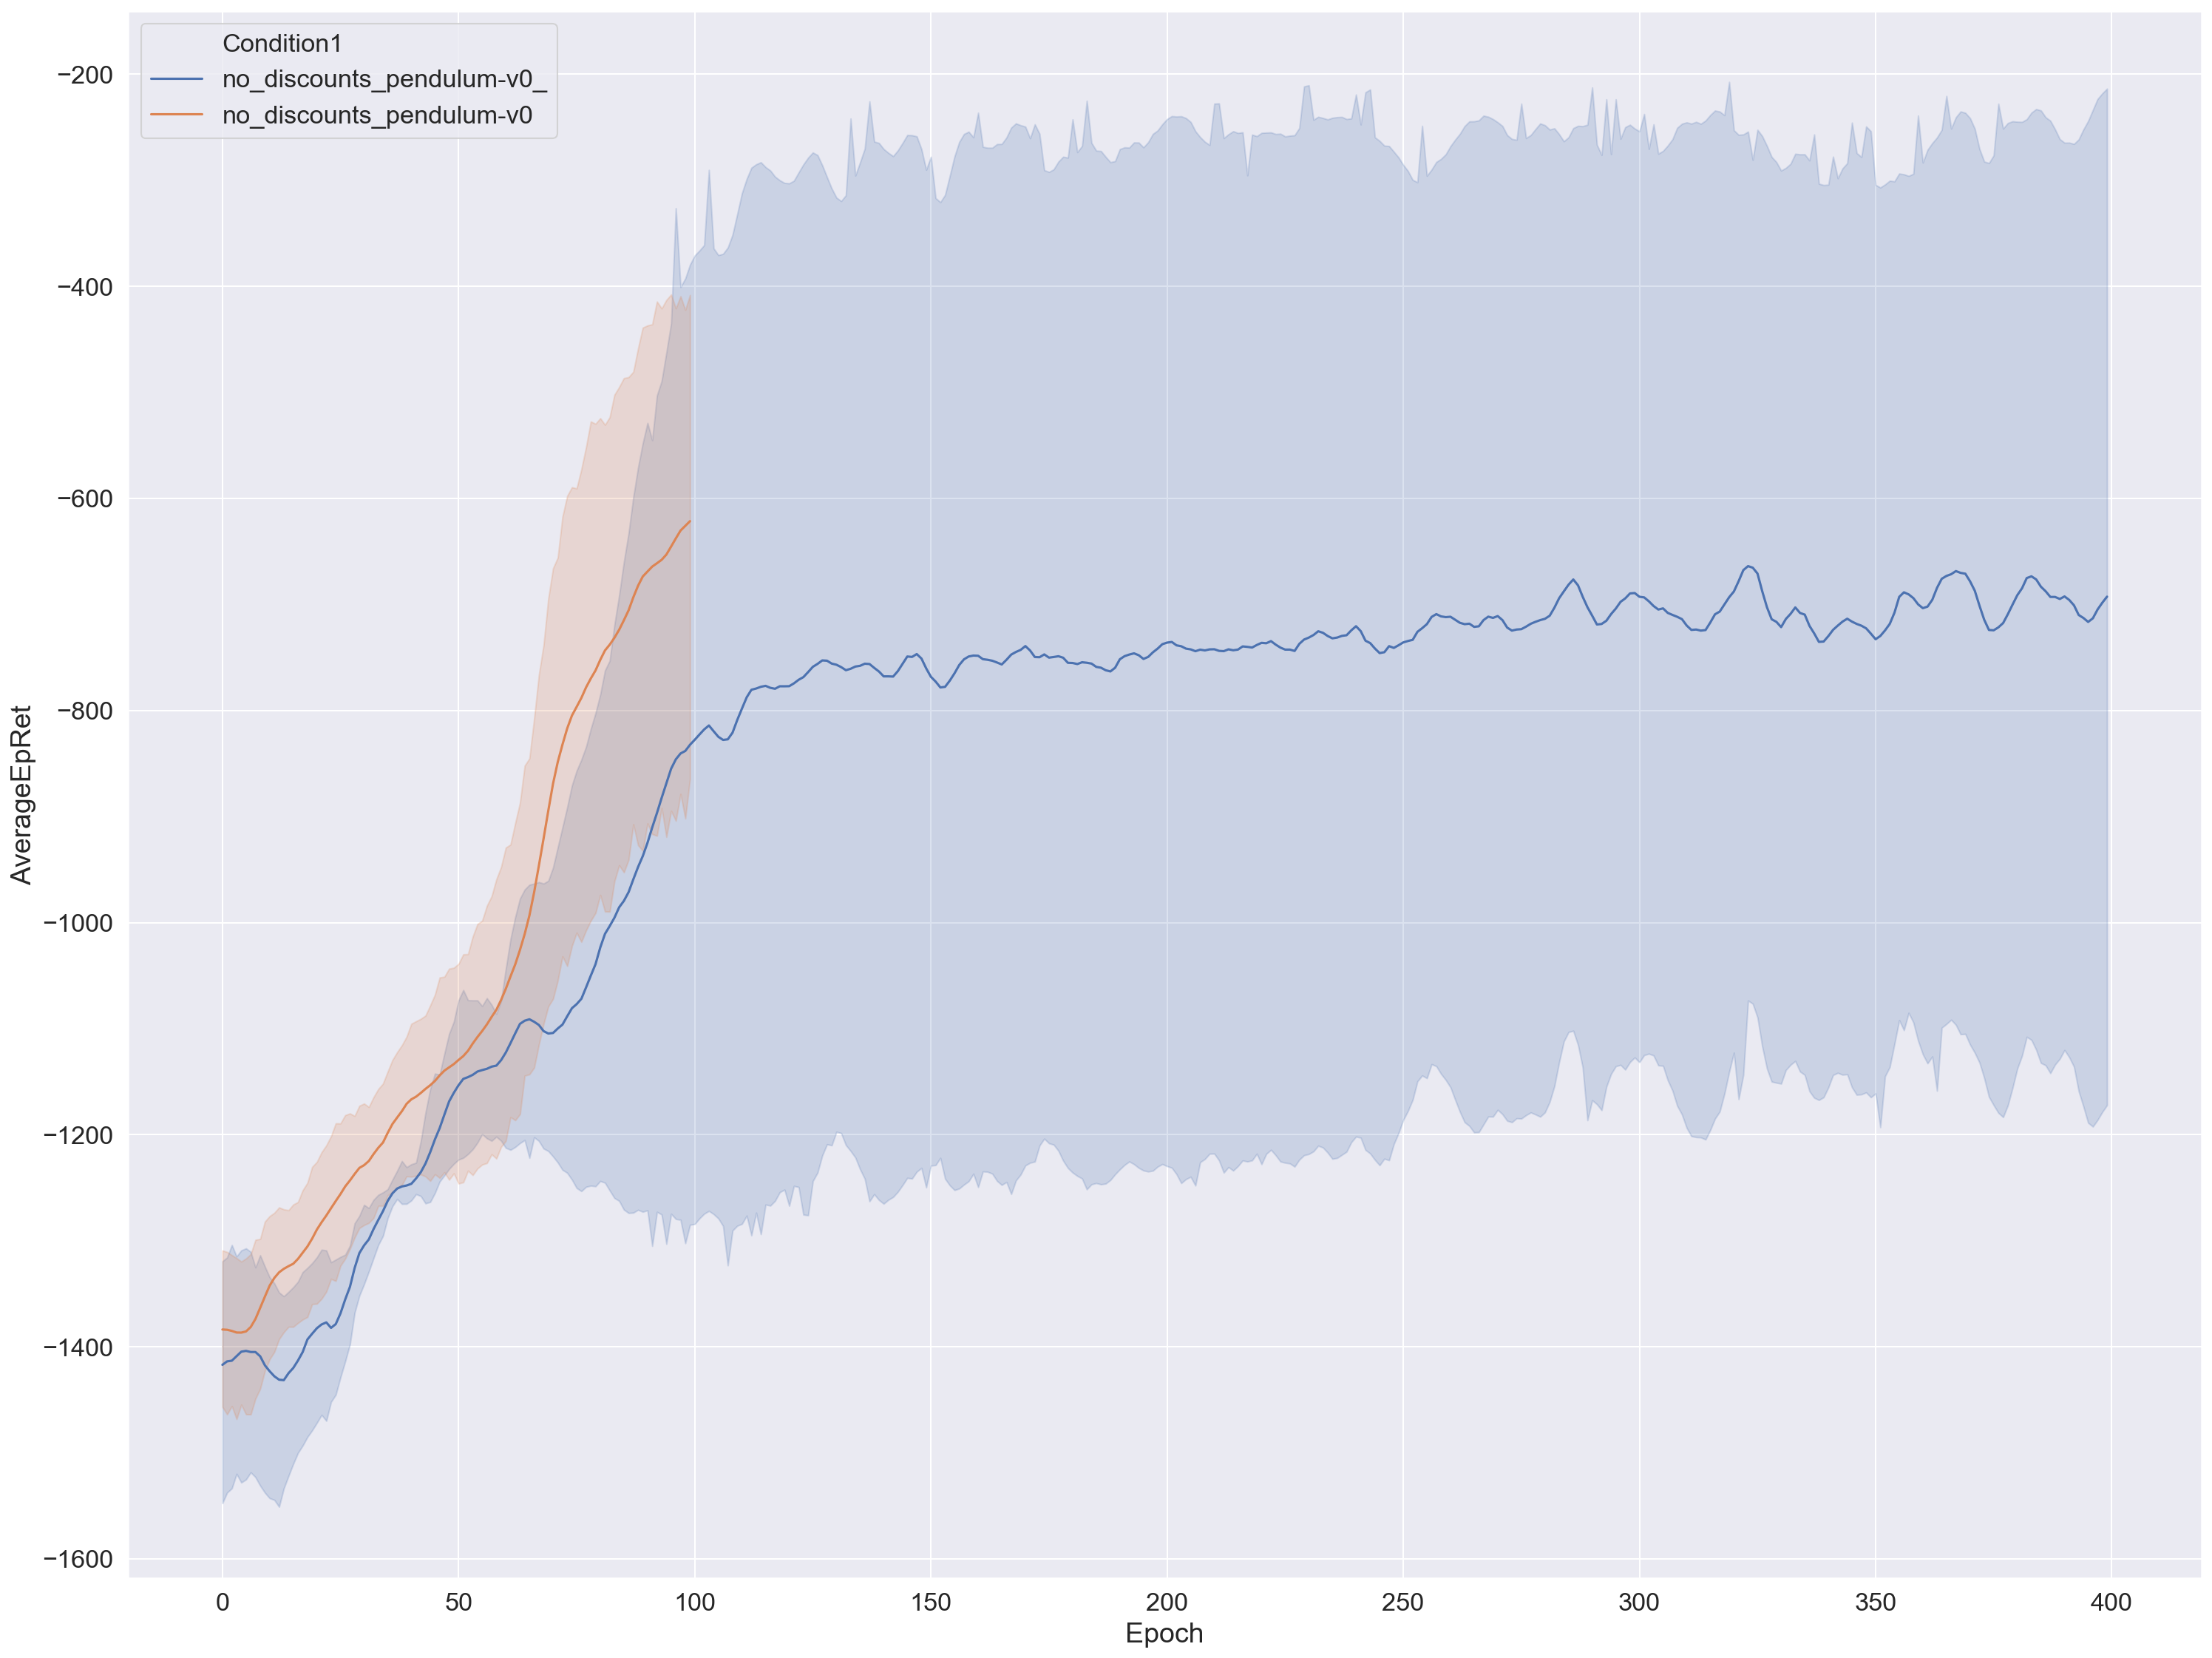

In [19]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5)
plt.show()

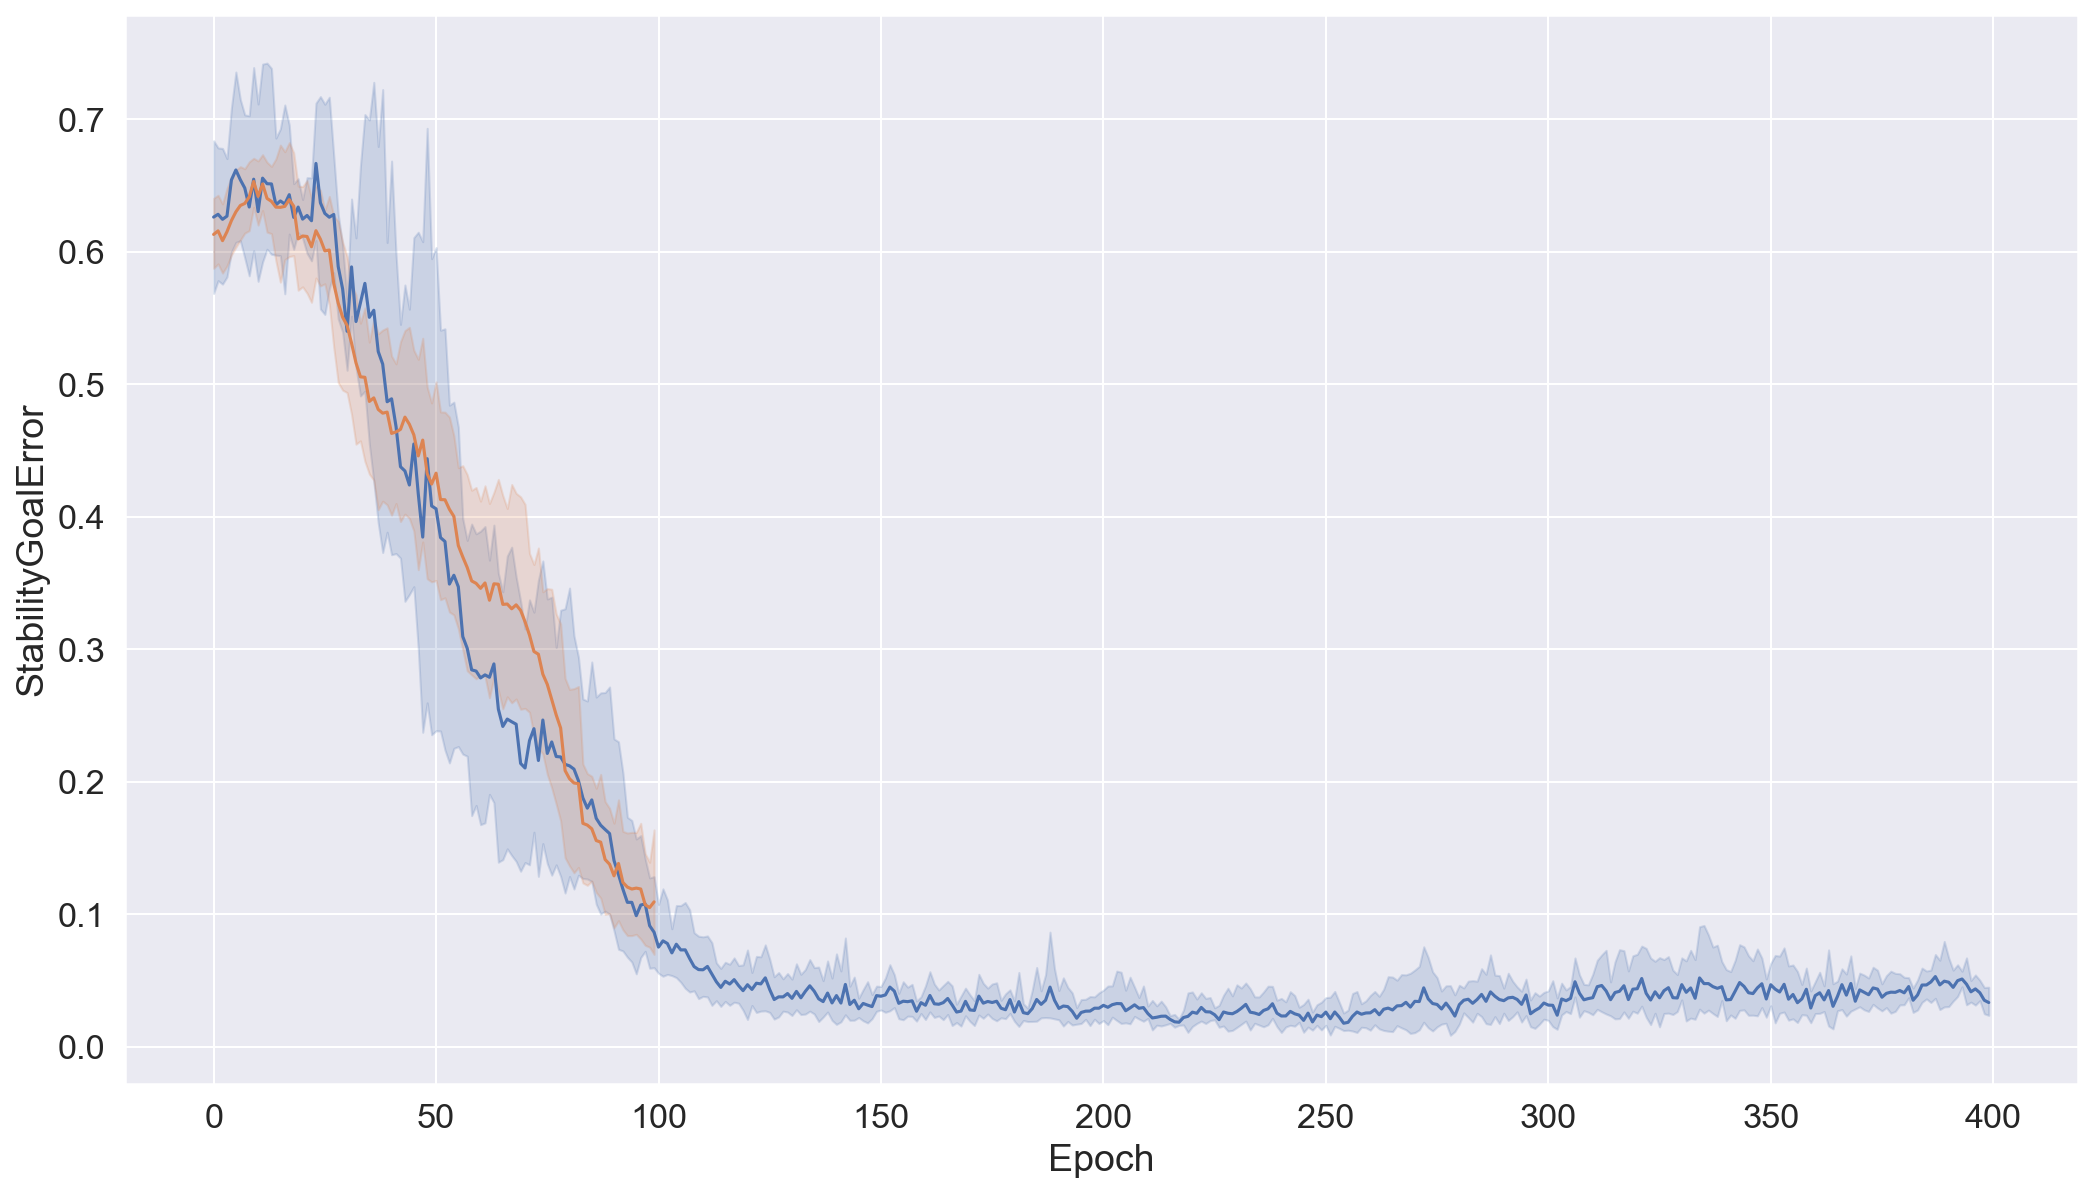

In [20]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityGoalError', smooth=1, show_legend=False, estimator='mean')
plt.show()

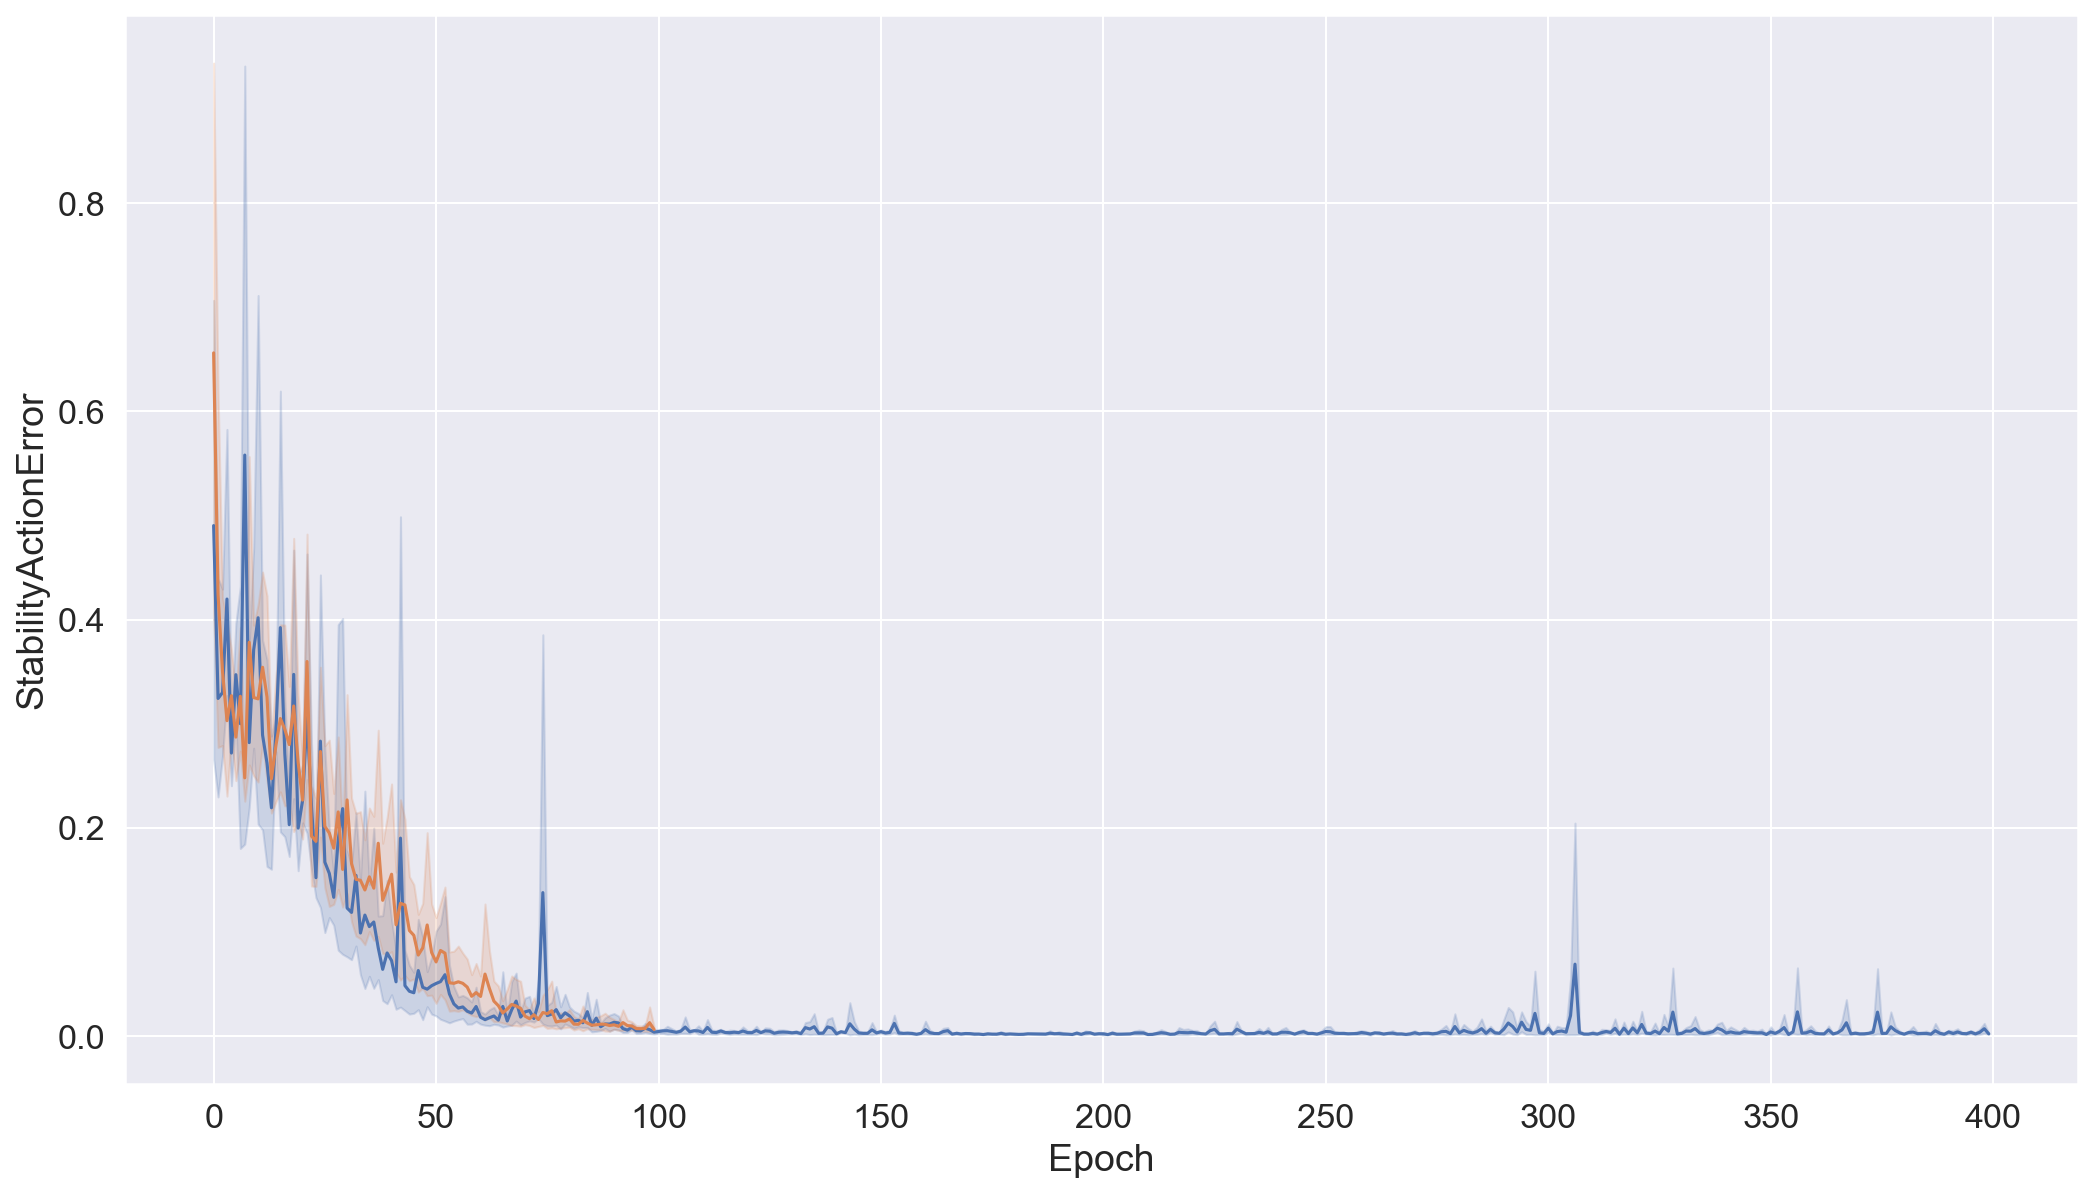

In [21]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='StabilityActionError', smooth=1, show_legend=False)
plt.show()

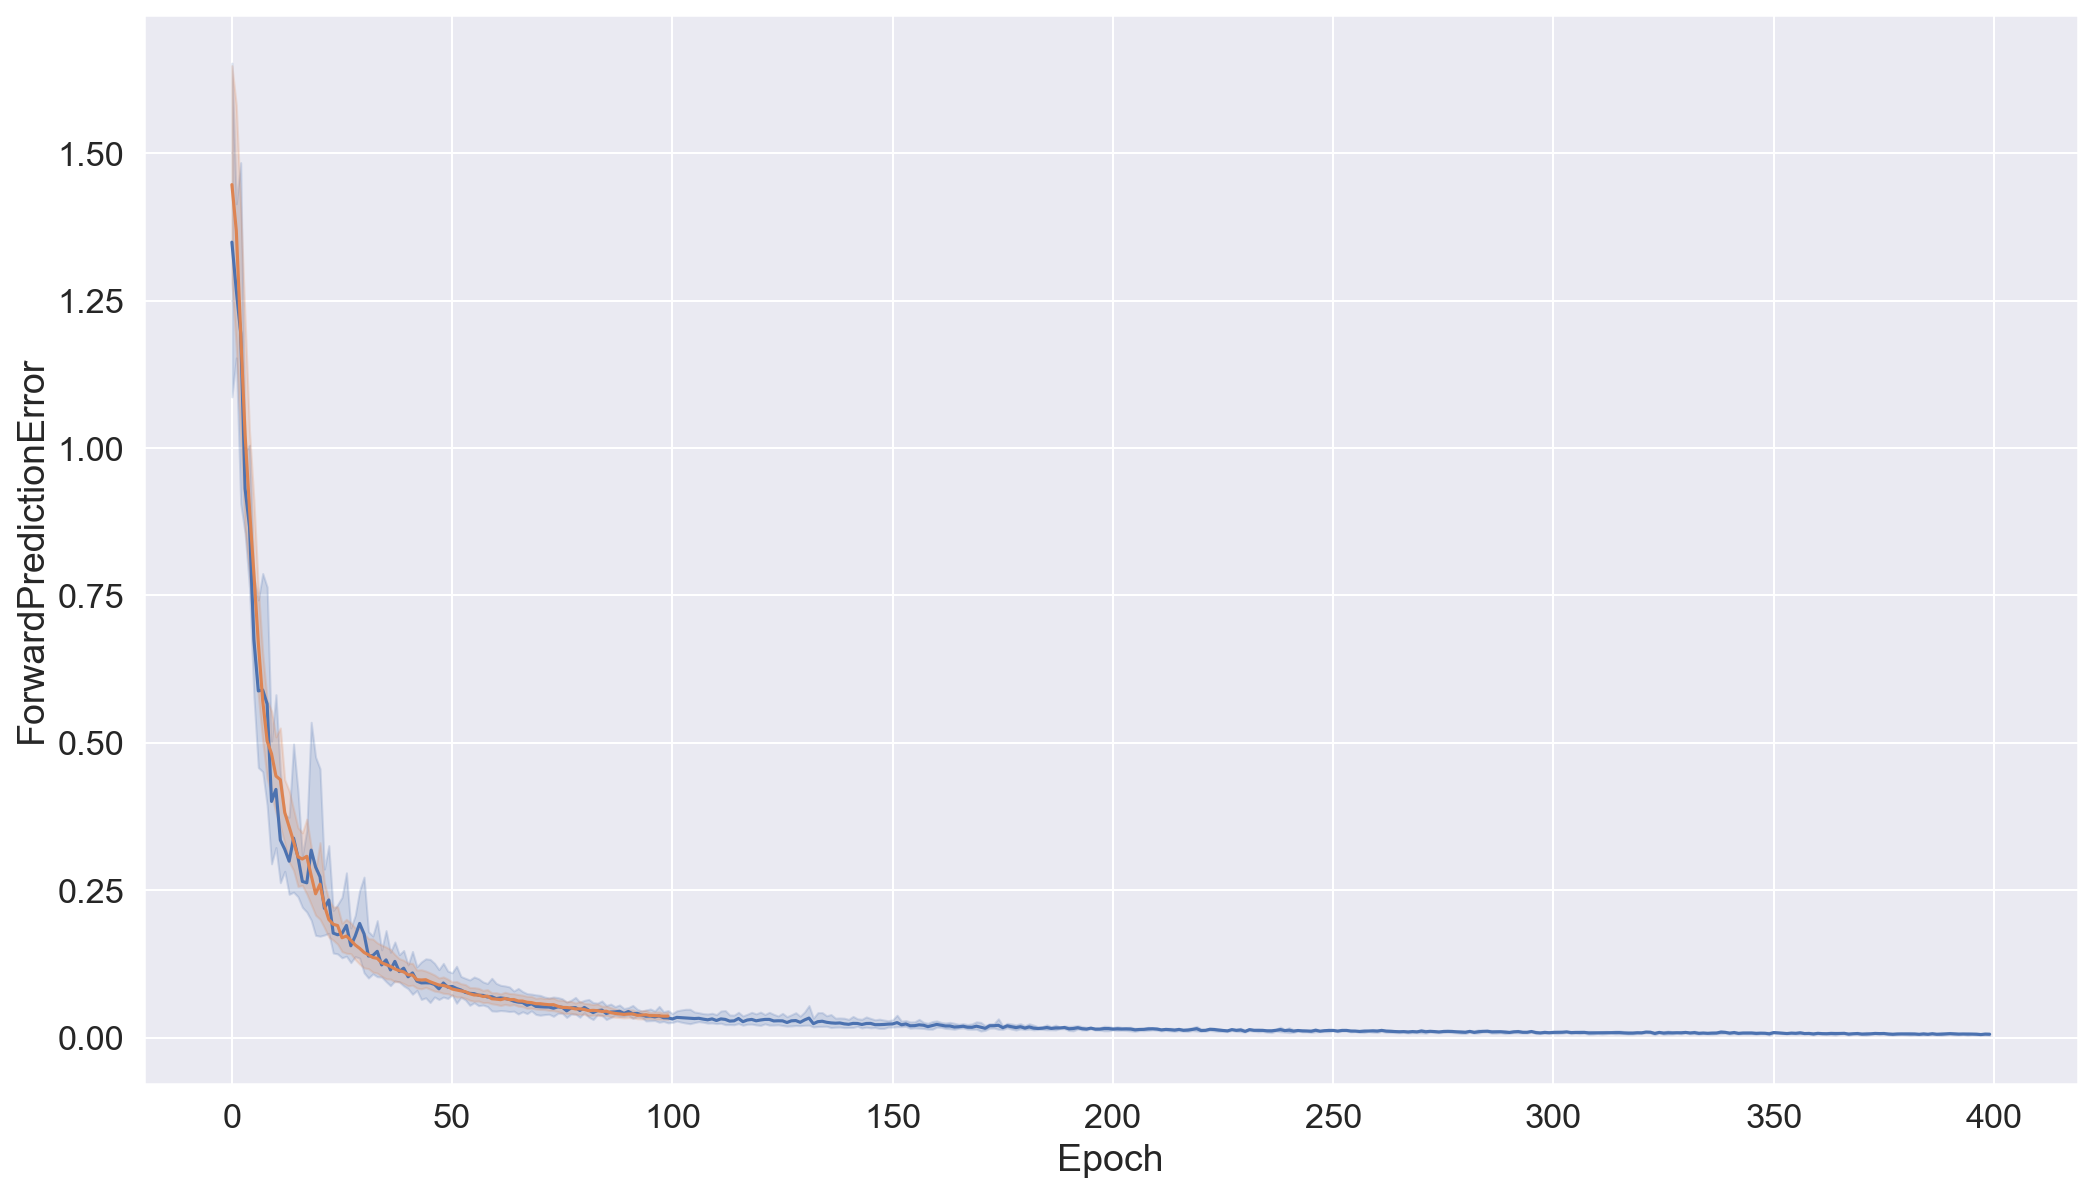

In [22]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ForwardPredictionError', smooth=1, show_legend=False)
plt.show()

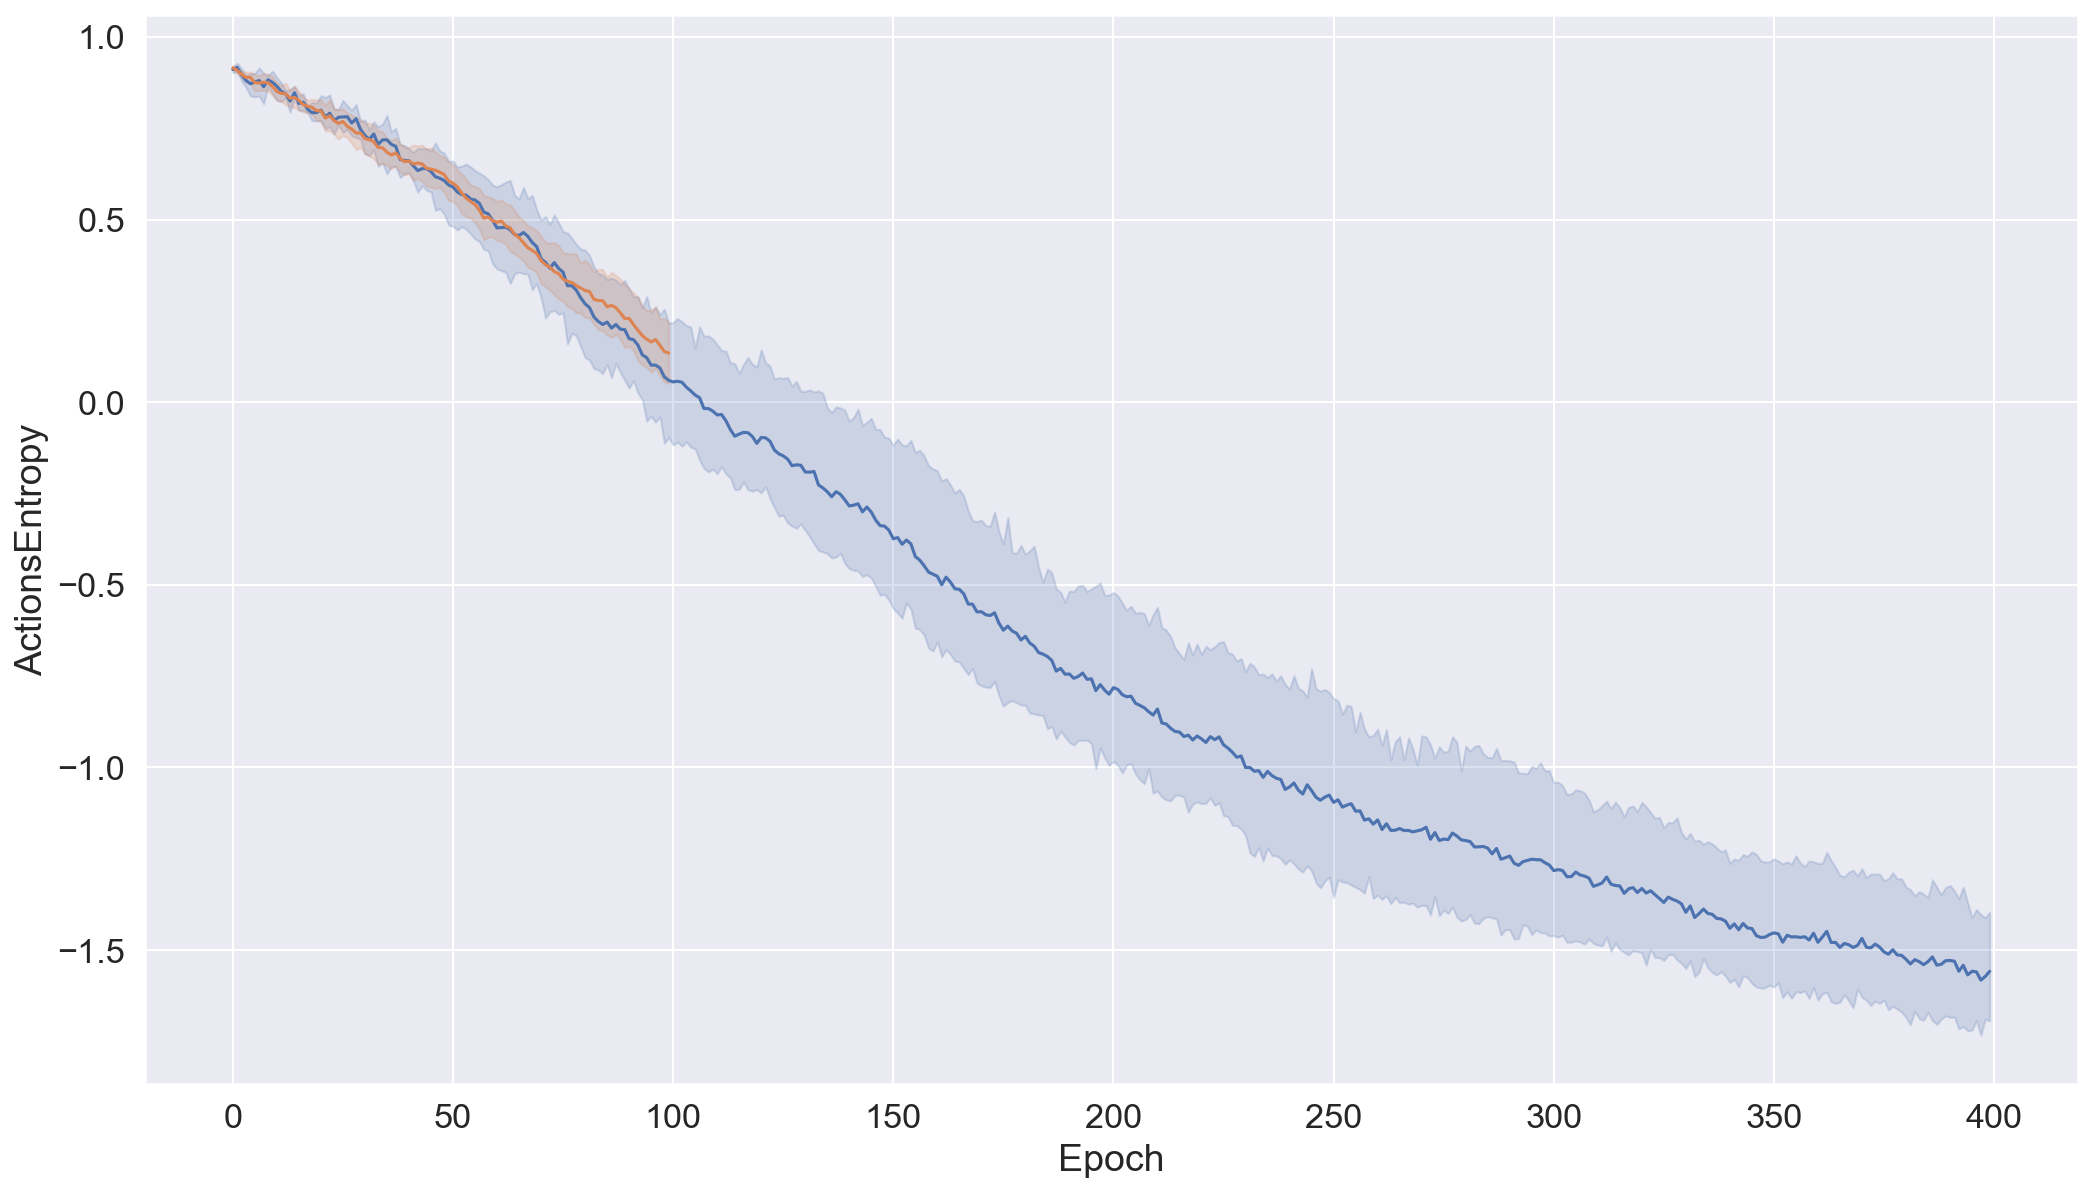

In [23]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='ActionsEntropy', smooth=1, show_legend=False)
plt.show()

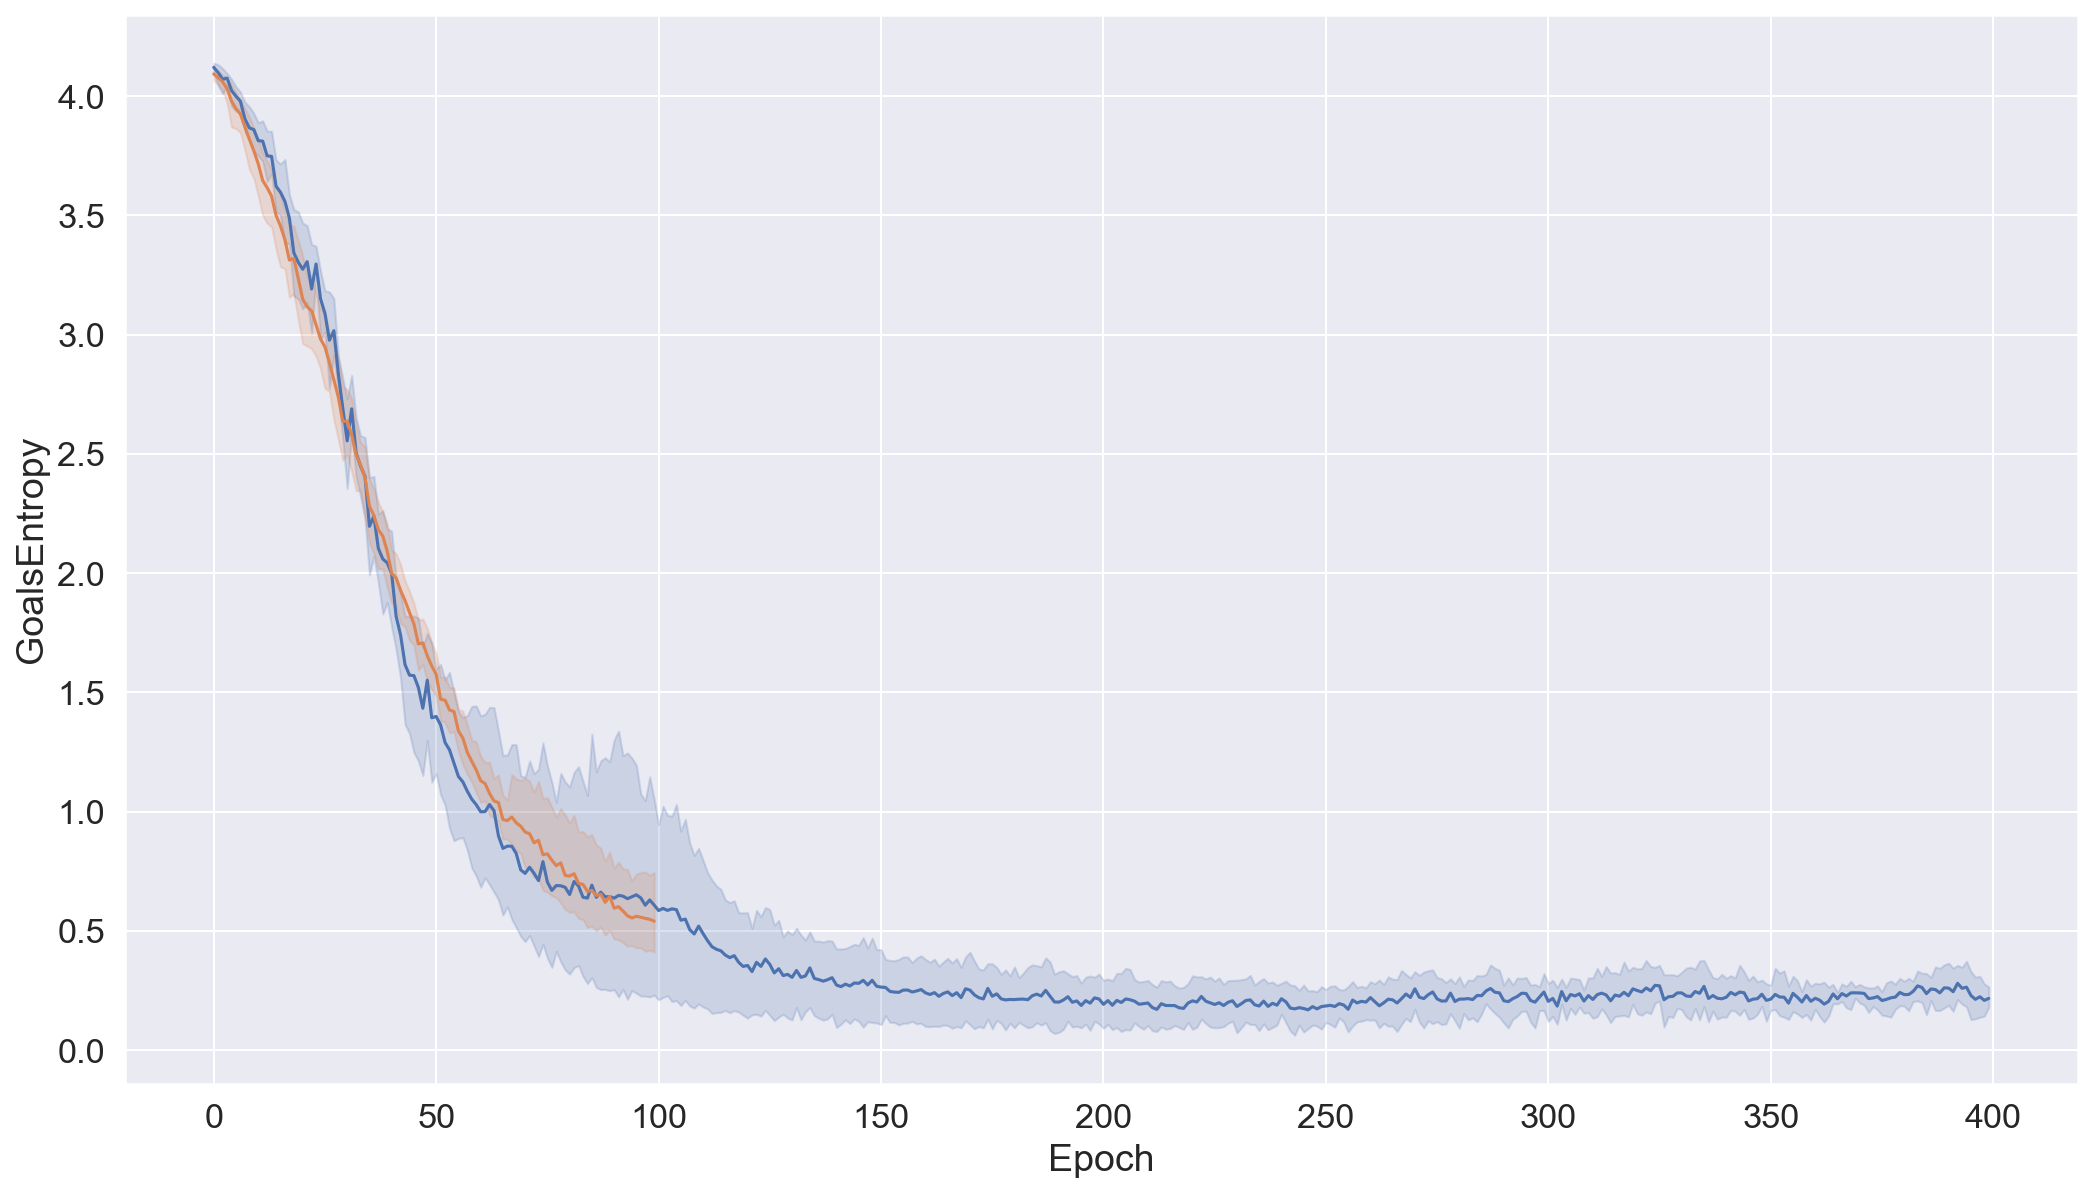

In [24]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalsEntropy', smooth=1, show_legend=False)
plt.show()

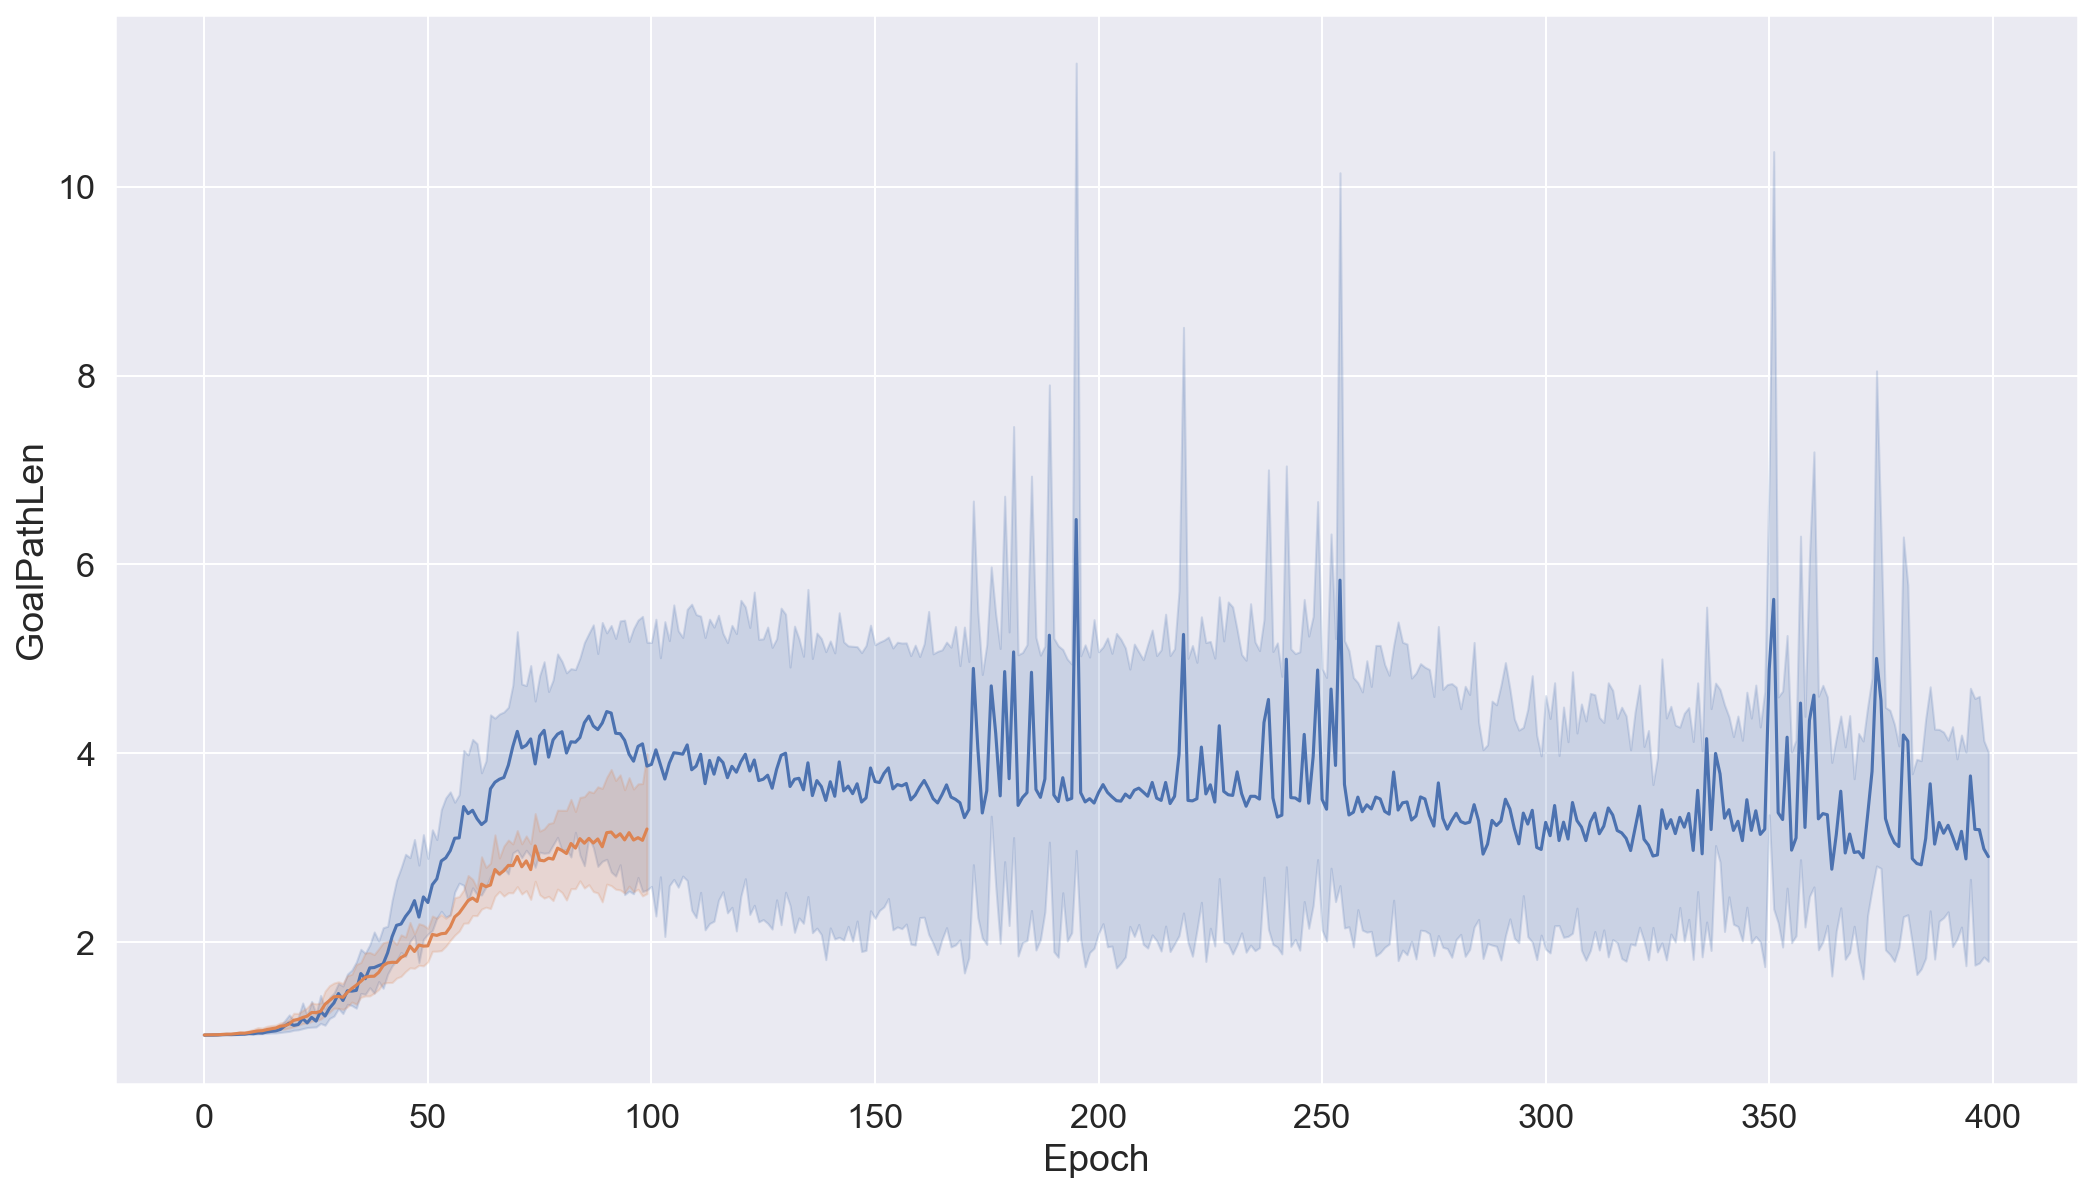

In [25]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalPathLen', smooth=1, show_legend=False)
plt.show()